## Importing all the required libraries

In [1]:
import matplotlib.pyplot as plt
import sys
import pickle as pk
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import np_utils


Using TensorFlow backend.


## Loading dataset

In [2]:
data = pk.load(open("./final_project_dataset.pkl", "rb") )

## Converting dict into dataframe

In [3]:
dataset = pd.DataFrame.from_dict(data, orient='index')
print(dataset.head())
print("\nThere are %d features for %d obeservation"%(dataset.shape[1],dataset.shape[0]))

                    salary to_messages deferral_payments total_payments  \
ALLEN PHILLIP K     201955        2902           2869717        4484442   
BADUM JAMES P          NaN         NaN            178980         182466   
BANNANTINE JAMES M     477         566               NaN         916197   
BAXTER JOHN C       267102         NaN           1295738        5634343   
BAY FRANKLIN R      239671         NaN            260455         827696   

                   loan_advances    bonus               email_address  \
ALLEN PHILLIP K              NaN  4175000     phillip.allen@enron.com   
BADUM JAMES P                NaN      NaN                         NaN   
BANNANTINE JAMES M           NaN      NaN  james.bannantine@enron.com   
BAXTER JOHN C                NaN  1200000                         NaN   
BAY FRANKLIN R               NaN   400000         frank.bay@enron.com   

                   restricted_stock_deferred deferred_income  \
ALLEN PHILLIP K                      -126027  

## Dataset description

In [4]:
dataset.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,...,58,102,65,93,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,...,60,44,60,53,60,128,80,60,36,129


## Features names and segregating its category

In [5]:
Features = list(dataset.columns)
print("Features :-\n\t",Features)
EmailFeatures = ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
                  'shared_receipt_with_poi']
print("\nEmail Features :-\n\t",EmailFeatures)
FinancialFeatures = [feature for feature in Features if not feature in EmailFeatures]
print("\nFinancial Features :-\n\t",FinancialFeatures)


Features :-
	 ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']

Email Features :-
	 ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

Financial Features :-
	 ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'poi', 'long_term_incentive', 'restricted_stock', 'director_fees']


## Data Preprocessing

### Replacing NaN value into nan

In [6]:
dataset = dataset.replace('NaN', np.nan)


### Replacing nan in financial feature by 0

In [7]:
dataset[FinancialFeatures] = dataset[FinancialFeatures].fillna(0)

### Replacing nan in email feature by its median

In [8]:
dataset[EmailFeatures] = dataset[EmailFeatures].fillna(dataset[EmailFeatures].median())

### Removing Total from dataset

In [9]:
dataset.drop("TOTAL",inplace=True)

### Adding new features

In [10]:
dataset['ratio_messages_to_poi'] = dataset.from_this_person_to_poi / dataset.from_messages
dataset['ratio_messages_from_poi'] = dataset.from_poi_to_this_person / dataset.to_messages

In [11]:
new_features = list(dataset.columns)
print("New Features :-\n\t",new_features)

New Features :-
	 ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'ratio_messages_to_poi', 'ratio_messages_from_poi']


## Visualization

In [12]:
def visualize(dataset, features):
    fig, axes = plt.subplots(2,3,figsize=(15,6), sharex=False)
    for col, feat in enumerate(features):
        dataset[feat].plot(kind='kde', ax=axes[0,col])
        sns.boxplot(x=dataset[feat], ax=axes[1,col])
        axes[0,col].set_xlim(dataset[feat].min(), dataset[feat].max()*1.1);
        axes[1,col].set_xlim(dataset[feat].min(), dataset[feat].max()*1.1);

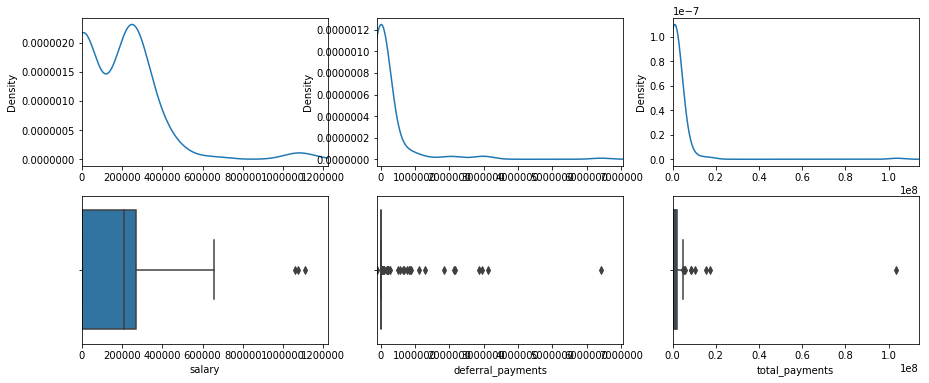

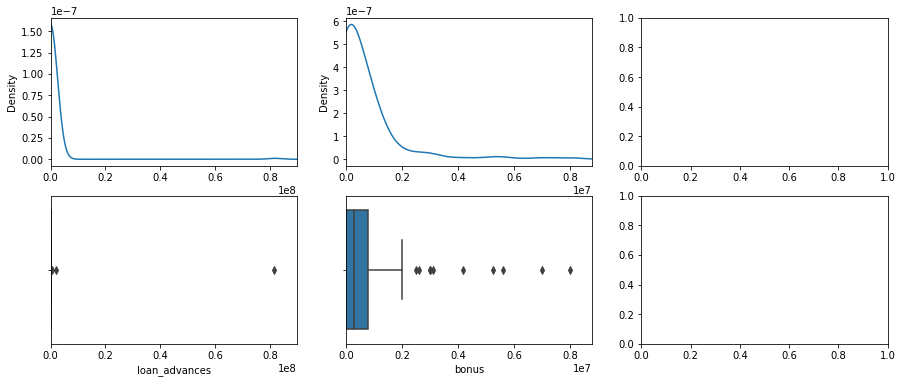

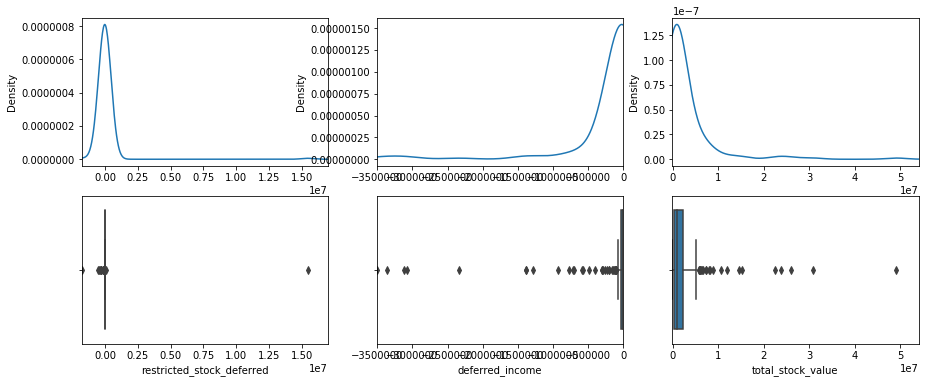

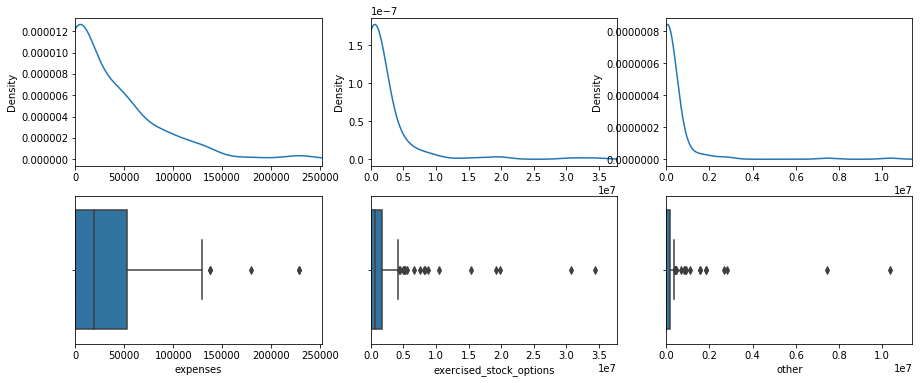

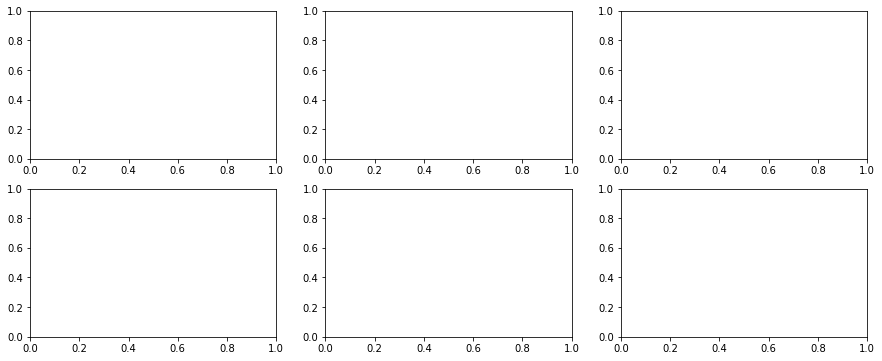

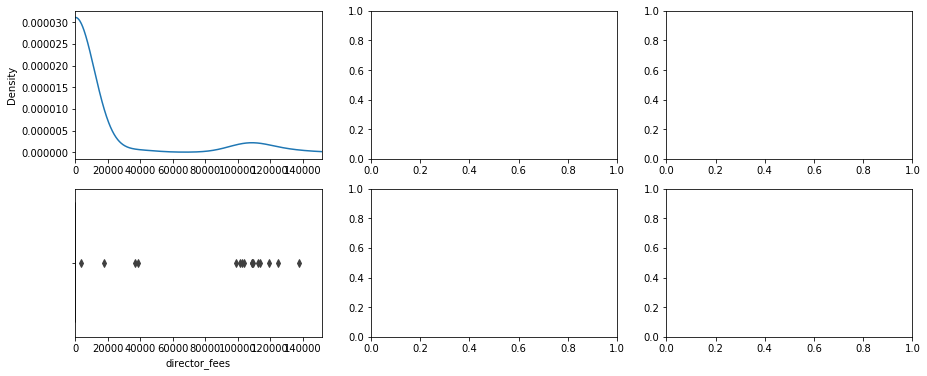

In [13]:
num = int(np.ceil(len(FinancialFeatures)/3.))
for i in range(num):
    stride = i*3
    try:
        visualize(dataset,FinancialFeatures[0+stride:3+stride])
    except:
        pass

## Input and Output data separation

In [14]:
dataset.drop("email_address",inplace=True,axis=1)
new_features.remove('email_address')
x = dataset.loc[:, dataset.columns != 'poi']
y = dataset.poi

In [15]:
print("Input :- \n\t",x.head())
print("\nOutput :- \n\t",y.head())

Input :- 
	                       salary  to_messages  deferral_payments  total_payments  \
ALLEN PHILLIP K     201955.0       2902.0          2869717.0       4484442.0   
BADUM JAMES P            0.0       1211.0           178980.0        182466.0   
BANNANTINE JAMES M     477.0        566.0                0.0        916197.0   
BAXTER JOHN C       267102.0       1211.0          1295738.0       5634343.0   
BAY FRANKLIN R      239671.0       1211.0           260455.0        827696.0   

                    loan_advances      bonus  restricted_stock_deferred  \
ALLEN PHILLIP K               0.0  4175000.0                  -126027.0   
BADUM JAMES P                 0.0        0.0                        0.0   
BANNANTINE JAMES M            0.0        0.0                  -560222.0   
BAXTER JOHN C                 0.0  1200000.0                        0.0   
BAY FRANKLIN R                0.0   400000.0                   -82782.0   

                    deferred_income  total_stock_value  

## Feature selection

In [16]:
selection = SelectKBest(k=10)
selection.fit(x,y)
selectedFeature =  [list(x.columns)[i] for i in range(len(list(x.columns))) if selection.get_support()[i]]

In [17]:
print("The selected Features are \n\t",selectedFeature)

The selected Features are 
	 ['salary', 'total_payments', 'bonus', 'deferred_income', 'total_stock_value', 'exercised_stock_options', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'ratio_messages_to_poi']


## Normalization

In [18]:
scaler = MinMaxScaler()
x[selectedFeature]=scaler.fit_transform(x[selectedFeature])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key, value)


##  80-20 Train test split dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 21)
print("Train data has",X_train.shape)
print("Test data has",X_test.shape)

Train data has (116, 21)
Test data has (29, 21)


## Parameter initializing

In [20]:
epoch = 30
batch = 128
classes = 2
optimizer = RMSprop() 
hidden = 128
validation = 0.1
dropout = 0.2

## one hot encoding 

In [21]:
Y_train = np_utils.to_categorical(y_train, classes)
Y_test = np_utils.to_categorical(y_test, classes)

## Model defining

In [22]:
model = Sequential()
model.add(Dense(hidden, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2816      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
__________

## Model training

In [23]:
history=model.fit(X_train, Y_train, batch_size=batch, epochs=epoch,verbose=True, validation_split=validation) 

Train on 104 samples, validate on 12 samples
Epoch 1/30
104/104 [==============================] - 0s 1ms/step - loss: 1.8598 - acc: 0.8846 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 2/30
104/104 [==============================] - 0s 22us/step - loss: 2.0148 - acc: 0.8750 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 3/30
104/104 [==============================] - 0s 20us/step - loss: 2.1700 - acc: 0.8654 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 4/30
104/104 [==============================] - 0s 20us/step - loss: 2.0148 - acc: 0.8750 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 5/30
104/104 [==============================] - 0s 19us/step - loss: 2.0148 - acc: 0.8750 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 6/30
104/104 [==============================] - 0s 19us/step - loss: 2.0148 - acc: 0.8750 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 7/30
104/104 [==============================] - 0s 20us/step - loss: 2.0148 - acc: 0.8750 - val_loss: 2.6863 - val_acc: 0.8333
Epoch 8/30
104/104 [=====

## Prediction and accuracy score

In [24]:
score = model.evaluate(X_test, Y_test, verbose=True)
print("The accuracy score of Multilayer Preceptron is %f"%score[1])


29/29 [==============================] - 0s 22us/step
The accuracy score of Multilayer Preceptron is 0.896552


## Graph of training loss and accuracy

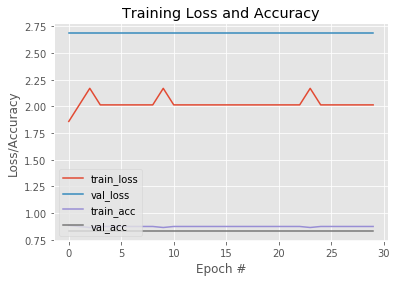

In [25]:
plt.style.use("ggplot")
plt.figure()
N = epoch
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("output.jpg")
plt.show()

## Confusion Matrix

In [26]:
def plot_confusion_matrix(cm,classes=[0,1],normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

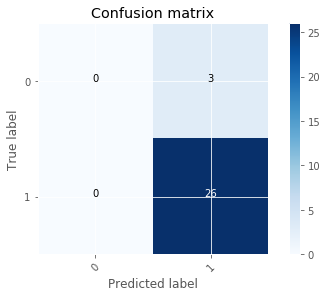

In [27]:
plt.figure()
y_pred =  np_utils.to_categorical(model.predict_classes(X_test), num_classes= classes)
try:
    Y_test = [test[0] for test in Y_test]
    y_pred = [pred[0] for pred in y_pred]
except:
    pass
cm = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(cm)
plt.savefig("confusion_matrix.jpeg", bbox_inches='tight')
plt.show()

## Classification report

In [28]:
y_pred = model.predict_classes(X_test)

In [29]:
report = classification_report(y_pred,y_test)
print(report)

             precision    recall  f1-score   support

          0       1.00      0.90      0.95        29
          1       0.00      0.00      0.00         0

avg / total       1.00      0.90      0.95        29



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
